In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


path = '../dataset/pv/cough/continuous/continuous_1.gz'
data = pd.read_csv(path, compression='gzip', skiprows=7, delimiter='\t',header=None)
start_s=0
end_s=50
ms=False
data = data[:][:-7] #remove the final 7 rows for continuous_2 dataset
for j in range(len(data.columns)):
    data[j] = [float(i) for i in data[j]]
    
if not ms:  
    ts = data[0][1]-data[0][0]
    fs = int(np.rint(1/ts))
else:
    ts = (data[0][1]-data[0][0])/1000
    fs = int(np.rint(1/ts))

time = data[0][int(start_s*fs): int(end_s*fs)].to_numpy()-data[0][0]-start_s
pv = data[data.columns[1:]][int(start_s*fs): int(end_s*fs)].to_numpy()
audio = np.zeros(end_s*fs - start_s*fs)
# data

In [2]:
font = {'family': 'arial',
        'size': 18}
linecolors = ['#0067ba', '#8f8993', '#ccaf65', '#ffd700']

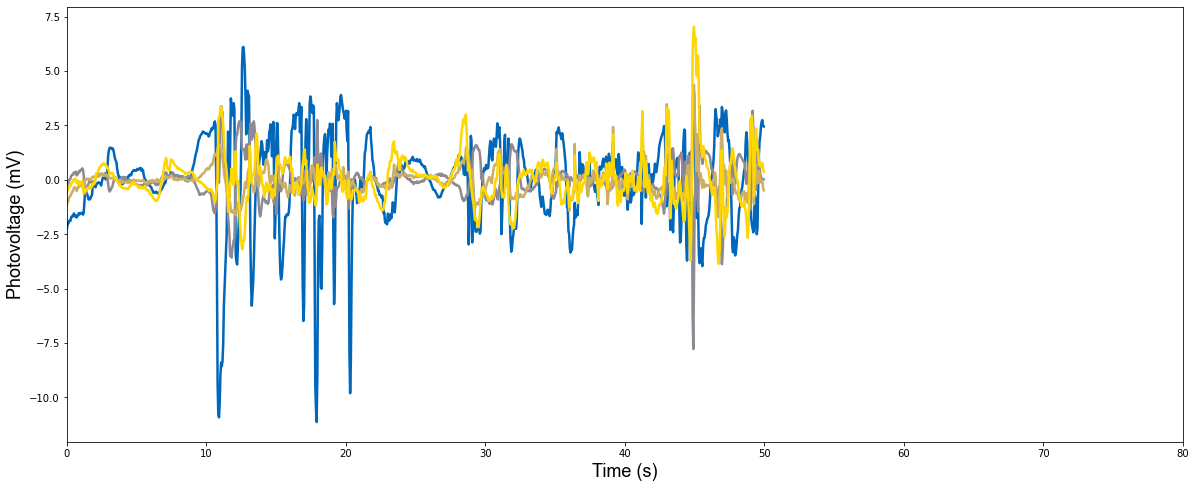

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose
pv_det = seasonal_decompose(pv, model='additive', period=75, extrapolate_trend='freq')

fig = plt.figure(figsize=[20, 8])
ax = fig.add_subplot()

ax.set_xlim(0, 80)
# ax.set_xticks(np.arange(0, 100, 20))
# ax.set_xticklabels(np.arange(0, 100, 20), fontdict=font)
ax.set_xlabel('Time (s)', fontdict=font)

# ax.set_ylim(325, 385)
# ax.set_yticks(np.arange(325, 395, 10))
# ax.set_yticklabels(np.arange(325, 395, 10), fontdict=font)
ax.set_ylabel('Photovoltage (mV)', fontdict=font)

lines = ax.plot(time, pv-pv_det.trend)
for ii, line in enumerate(lines):
    line.set_linewidth(2.5)
    line.set_color(linecolors[ii])

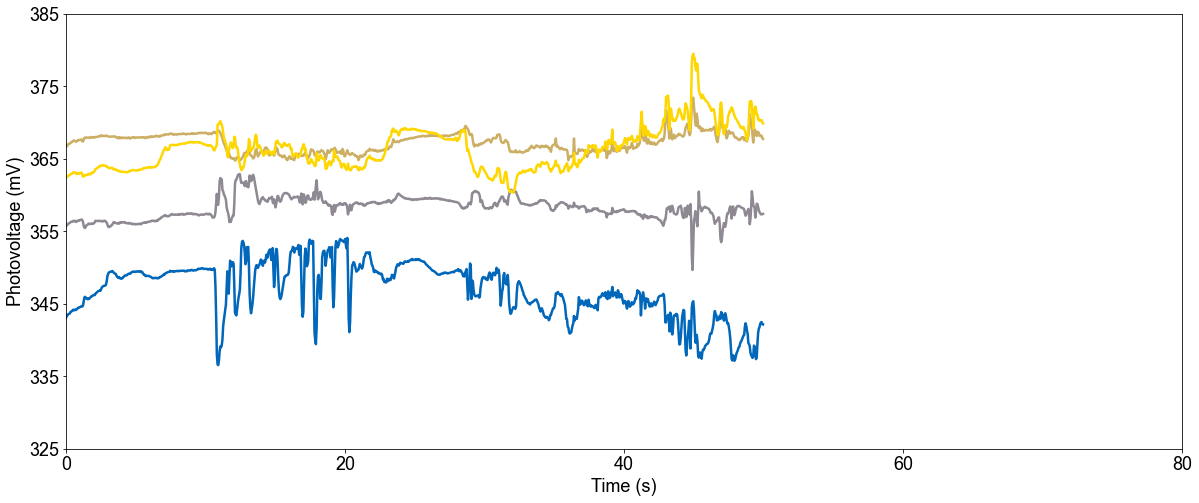

In [4]:


fig = plt.figure(figsize=[20, 8])
ax = fig.add_subplot()

ax.set_xlim(0, 80)
ax.set_xticks(np.arange(0, 100, 20))
ax.set_xticklabels(np.arange(0, 100, 20), fontdict=font)
ax.set_xlabel('Time (s)', fontdict=font)

ax.set_ylim(325, 385)
ax.set_yticks(np.arange(325, 395, 10))
ax.set_yticklabels(np.arange(325, 395, 10), fontdict=font)
ax.set_ylabel('Photovoltage (mV)', fontdict=font)

lines = ax.plot(time, pv)
for ii, line in enumerate(lines):
    line.set_linewidth(2.5)
    line.set_color(linecolors[ii])

plt.show()

Text(0, 0.5, 'Photovoltage (mV)')

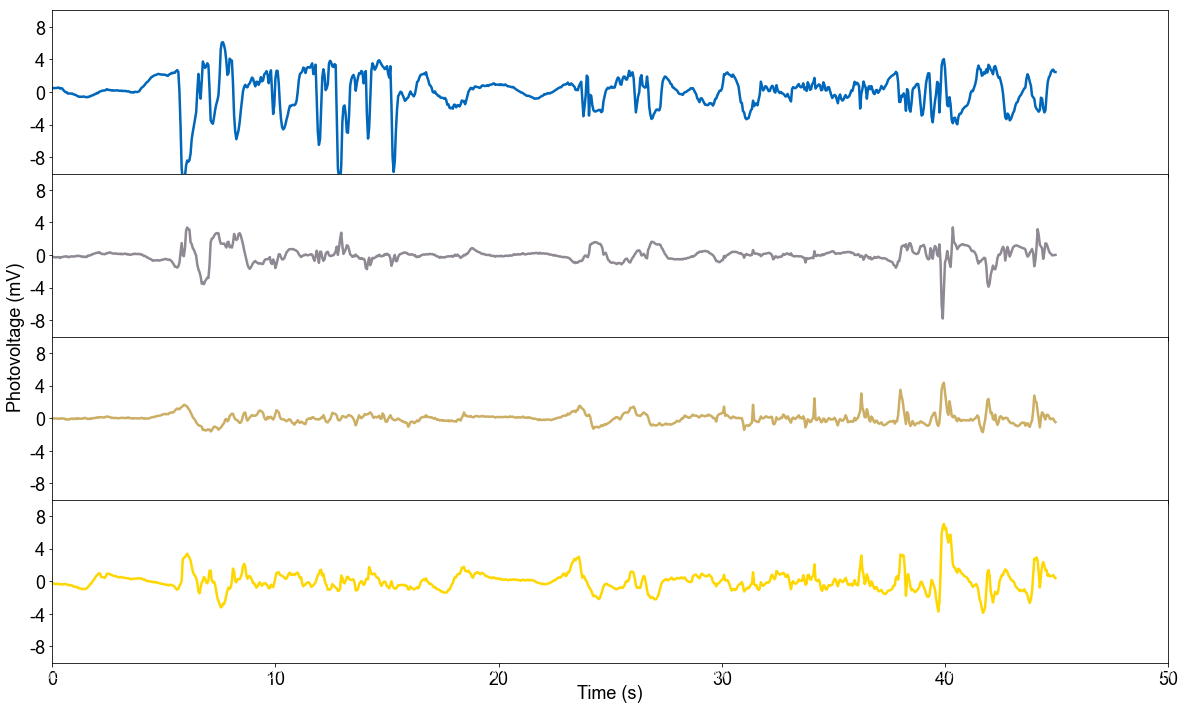

In [5]:
fig, axes = plt.subplots(4, figsize=[20, 12], sharex=True)
for ii, ax in enumerate(axes):
    line, = ax.plot(time, pv[:, ii]-pv_det.trend[:, ii], linewidth=2.5)
    line.set_color(linecolors[ii])
    
    ax.set_xlim(5, 50)
    ax.set_xticks(np.arange(5, 60, 10))
    ax.set_xticklabels(np.arange(0, 60, 10), fontdict=font)

    ax.set_ylim(-10, 10)
    ax.set_yticks(np.arange(-8, 10, 4))
    ax.set_yticklabels(np.arange(-8, 10, 4), fontdict=font)
    # ax.set_ylabel('Photovoltage (mV)', fontdict=font)

plt.subplots_adjust(hspace=0, wspace=0)

ax_label = fig.add_subplot(111)
ax_label.spines['top'].set_color('none')
ax_label.spines['bottom'].set_color('none')
ax_label.spines['left'].set_color('none')
ax_label.spines['right'].set_color('none')
ax_label.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
ax_label.patch.set_alpha(0.0)

ax_label.set_xlabel('Time (s)', fontdict=font)
ax_label.set_ylabel('Photovoltage (mV)', fontdict=font)

[    0.            99.73835945   199.6948719    300.42600632
   400.1595974    499.8922348    599.62463379   699.36275482
   800.08769035   899.27411079  1000.6082058   1099.64179993
  1200.44231415  1300.73785782  1400.75469017  1502.00867653
  1600.74281693  1700.47664642  1800.90880394  1900.58374405
  2000.09083748  2100.79312325  2201.23434067  2301.17201805
  2400.47621727  2500.88858604  2600.62599182  2700.70958138
  2801.14126205  2919.71921921  3019.41108704  3120.14317513
  3220.01051903  3319.89693642  3420.71533203  3520.44606209
  3620.18084526  3720.54576874  3820.27721405  3920.52388191
  4020.62702179  4121.35720253  4220.09325027  4319.69428062
  4420.36247253  4520.39384842  4619.12989616  4720.15023232
  4819.11158562  4939.73183632  5039.55030441  5140.5749321
  5240.71097374  5339.41221237  5439.76664543  5539.50977325
  5639.23382759  5739.57395554  5839.30897713  5941.03574753
  6040.31968117  6140.28072357  6240.38815498  6340.17515182
  6440.94204903  6540.331

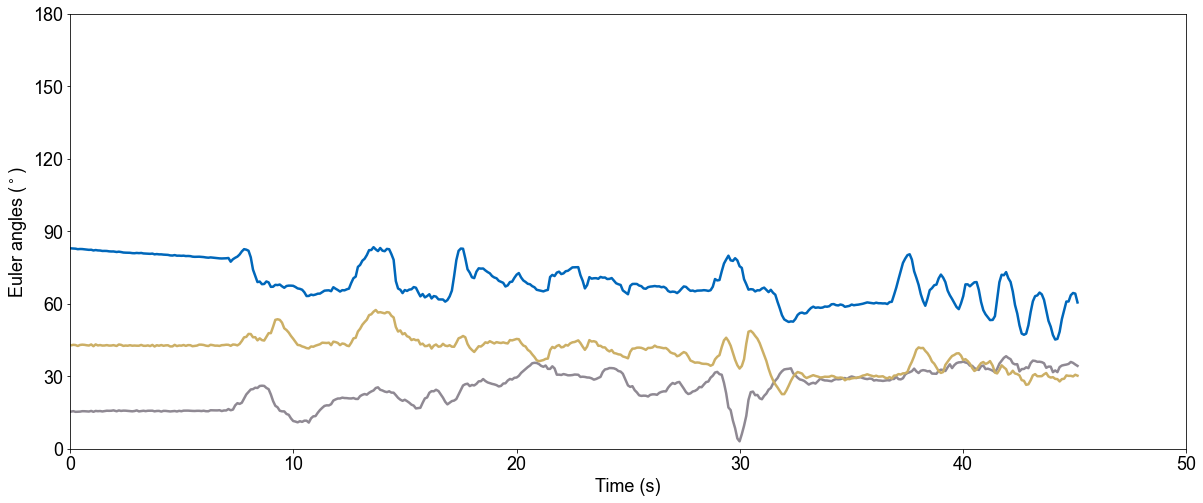

In [6]:
path = '../dataset/orientation/cough/continuous/continuous_2.gz'
data = pd.read_csv(path, compression='gzip', skiprows=7, delimiter='\t',header=None)
start_s=0
end_s=50
ms=True
data = data[:][:-7] #remove the final 7 rows for continuous_2 dataset
for j in range(len(data.columns)):
    data[j] = [float(i) for i in data[j]]
    
if not ms:  
    ts = data[0][1]-data[0][0]
    fs = int(np.rint(1/ts))
else:
    ts = (data[0][1]-data[0][0])/1000
    fs = int(np.rint(1/ts))

timestamps = data[0][int(start_s*fs): int(end_s*fs)].to_numpy()-data[0][0]-start_s
orientation = data[data.columns[1:]][int(start_s*fs): int(end_s*fs)].to_numpy()
audio = np.zeros(end_s*fs - start_s*fs)
print(timestamps)

fig = plt.figure(figsize=[20, 8])
ax = fig.add_subplot()

ax.set_xlim(5000, 51000)
ax.set_xticks(np.arange(5000, 61000, 10000))
ax.set_xticklabels(np.arange(0, 60, 10), fontdict=font)
ax.set_xlabel('Time (s)', fontdict=font)

ax.set_ylim(0, 180)
ax.set_yticks(np.arange(0, 200, 30))
ax.set_yticklabels(np.arange(0, 200, 30), fontdict=font)
ax.set_ylabel('Euler angles ($^\circ$)', fontdict=font)

lines = ax.plot(timestamps, orientation)
for ii, line in enumerate(lines):
    line.set_linewidth(2.5)
    line.set_color(linecolors[ii])

plt.show()